# <span style = 'color: #3D9970'> **01. Carregar dados e módulos:** </span>

## <span style = 'color: #39CCCC'> **Carregando módulos e bibliotecas:** </span>

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import locale

#### <span style = 'color: FFFFFF'> **Configurando o locale para *pt-br*:** </span>

In [95]:
locale.setlocale(locale.LC_ALL, 'pt_BR.utf8')

'pt_BR.utf8'

## <span style = 'color: #39CCCC'> **Instalando, ativando e desativando maquina virtual:** </span>

In [2]:
# Para instalar um ambiente virtual, abra o terminal e digite:
# ------------------------------------------------------------ 
# sudo pip3 install virtualenv
# ------------------------------------------------------------ 
# Para criar um ambiente virtual, abra o terminal no diretório desejado e digite:
# ------------------------------------------------------------ 
# virtualenv venv
# ------------------------------------------------------------ 
# Para inicar um ambiente virtual, abra o terminal no diretório desejado e digite:
# ------------------------------------------------------------ 
# source venv/bin/activate
# ------------------------------------------------------------ 
# Para desativar um ambiente virtual, abra o terminal no diretório desejado e digite:
# ------------------------------------------------------------ 
# deactivate
# ------------------------------------------------------------ 

## <span style = 'color: #39CCCC'> **Carregando dataset's:** </span>

In [3]:
olist_customers_dataset = pd.read_csv('../data/raw/olist_customers_dataset.csv')
olist_geolocation_dataset = pd.read_csv('../data/raw/olist_geolocation_dataset.csv')
olist_order_items_dataset = pd.read_csv('../data/raw/olist_order_items_dataset.csv')
olist_order_payments_dataset = pd.read_csv('../data/raw/olist_order_payments_dataset.csv')
olist_order_reviews_dataset = pd.read_csv('../data/raw/olist_order_reviews_dataset.csv')
olist_orders_dataset = pd.read_csv('../data/raw/olist_orders_dataset.csv')
olist_products_dataset = pd.read_csv('../data/raw/olist_products_dataset.csv')
olist_sellers_dataset = pd.read_csv('../data/raw/olist_sellers_dataset.csv')
product_category_name_translation = pd.read_csv('../data/raw/product_category_name_translation.csv')

## <span style = 'color: #39CCCC'> **Funções:** </span>

In [156]:
def visualizar_tabela(dataset):
    return dataset.head(5)

def valores_nulos_dataset(dataset):
    print(dataset.isnull().sum())
    print(dataset.info())

def info_descritiva(dataset):
    return dataset.describe()

def colunas_dataset(dataset):
    return list(dataset.columns.values)

def valores_colunas(dataset, coluna):
    return dataset[coluna].unique()

def formatar_valores_para_reais(dataset, coluna1, coluna2):
    dataset[coluna1] = 'R$ ' + dataset[coluna2].round(2).astype(str)
    return dataset

# <span style = 'color: #3D9970'> **02. Exploração inicial:** </span>

## <span style = 'color: #39CCCC'> **Conhecendo os Datasets's:** </span>

### <span style = 'color: #0074D9'> **Clientes:** </span>

In [5]:
visualizar_tabela(olist_customers_dataset)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
info_descritiva(olist_customers_dataset) 

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [7]:
valores_nulos_dataset(olist_customers_dataset)

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


#### <span style = 'color: #cc9900'> *Análise das colunas:* </span>

| Colunas                  | Explicação                                               |
|--------------------------|----------------------------------------------------------|
| customer_id              | Esta coluna nos informa o ID de cada cliente.            |
| customer_unique_id       | Esta coluna nos informa o ID especifico de cada cliente. |
| customer_zip_code_prefix | Esta coluna nos informa o CEP de cada cliente.           |
| customer_city            | Esta coluna nos informa a cidade de cada cliente.        |
| customer_state           | Esta coluna nos informa o estado de cada cliente.        |

#### <span style = 'color: #cc9900'> *Comentários sobre o dataset:* </span>

- O dataset possui 5 colunas, sendo a única que não é um do tipo "object" é a coluna "customer_zip_code_prefix", sendo a mesma, do tipo "int64".
- O dataset não possui valor nulo em nenhuma de suas colunas.
- Para este dataset, não é necessário investigar dados estatistícos descritivos, já que a coluna que é do tipo "int", é uma coluna qualitativa.
- Por fim, podemos concluir que, este dataset, nos entrega dados a respeito do cliente de cada venda.

### <span style = 'color: #0074D9'> **Geolocalização:** </span>

In [8]:
visualizar_tabela(olist_geolocation_dataset)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [9]:
info_descritiva(olist_geolocation_dataset) 

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [10]:
valores_nulos_dataset(olist_geolocation_dataset)

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None


#### <span style = 'color: #cc9900'> *Análise das colunas:* </span>

| Colunas                     | Explicação                                             |
|-----------------------------|--------------------------------------------------------|
| geolocation_zip_code_prefix | Esta coluna nos informa o CEP.                         |
| geolocation_lat             | Esta coluna nos informa a posição de latitude do CEP.  |
| geolocation_lng             | Esta coluna nos informa a posição de longitude do CEP. |
| geolocation_city            | Esta coluna nos informa a cidade do CEP.               |
| geolocation_state           | Esta coluna nos informa o estado do CEP.               |

#### <span style = 'color: #cc9900'> *Comentários sobre o dataset:* </span>

- O dataset possui 5 colunas, sendo 1 coluna do tipo "int64" ("geolocation_zip_code_prefix"), 2 do tipo "float64" ("geolocation_lat" e "geolocation_lng") e por fim, 2 do tipo "object" ("geolocation_city" e "geolocation_state").
- O dataset não possui valor nulo em nenhuma de suas colunas.
- Para este dataset, não é necessário investigar dados estatistícos descritivos, já que as colunas que são do tipo "int64" e "float64", são colunas qualitativas.
- Por fim, podemos concluir que, este dataset, nos entrega dados do CEP.

### <span style = 'color: #0074D9'> **Pedido de compra:** </span>

In [11]:
visualizar_tabela(olist_order_items_dataset)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [12]:
info_descritiva(olist_order_items_dataset) 

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [13]:
valores_nulos_dataset(olist_order_items_dataset)

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None


#### <span style = 'color: #cc9900'> *Análise das colunas:* </span>

| Colunas             | Explicação                                                       |
|---------------------|------------------------------------------------------------------|
| order_id            | Esta coluna representa o ID do pedido.                           |
| order_item_id       | Esta coluna representa a quantidade de produtos no pedido.       |
| product_id          | Esta coluna representa o ID do produto no pedido.                |
| seller_id           | Esta coluna representa o ID da venda.                            |
| shipping_limit_date | Esta coluna representa ao prazo máximo de "despacho" do pedido.  |
| price               | Esta coluna representa os valores de cada pedido.                |
| freight_value       | Esta coluna representa os valores pagos no frete de cada pedido. |

#### <span style = 'color: #cc9900'> *Comentários sobre o dataset:* </span>

- O dataset possui 7 colunas, sendo 4 colunas do tipo "object" ("order_id", "product_id", "seller_id" e "shipping_limit_date"), 2 do tipo "float64" ("price" e "freight_value") e por fim, 1 coluna do tipo "int64" (order_item_id).
- O dataset não possui valor nulo em nenhuma de suas colunas.
- Realizando análises estatísticas descritivas neste dataset, podemos observar que há 112.650 pedidos, sendo que desses pedidos, a grande maioria possui uma média de 1 produto, a média de preço é de R$ 120,00 e a média de frete é de R$ 20,00. Além disso, o produto pedido mais caro possui o valor de R$ 6.735,00 e o maior frete de R$ 409,00.
- Por fim, podemos concluir que este dataset nos da informações a respeito dos pedidos realizados.

### <span style = 'color: #0074D9'> **Pagamentos:** </span>

In [14]:
visualizar_tabela(olist_order_payments_dataset)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [15]:
info_descritiva(olist_order_payments_dataset) 

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [16]:
valores_nulos_dataset(olist_order_payments_dataset)

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None


#### <span style = 'color: #cc9900'> *Análise das colunas:* </span>

| Colunas              | Explicação                                                                                           |
|----------------------|------------------------------------------------------------------------------------------------------|
| order_id             | Esta coluna representa o ID do pedido.                                                               |
| payment_sequential   | Esta coluna representa a quantidade de métodos de pagamentos utilizadas no pedido.                   |
| payment_type         | Esta coluna representa o tipo de pagamento realizado.                                                |
| payment_installments | Esta coluna representa a quantidade de parcelas.                                                     |
| payment_value        | Esta coluna representa o valor pago.                                                                 |

#### <span style = 'color: #cc9900'> *Comentários sobre o dataset:* </span>

- O dataset possui 5 colunas, sendo 2 do tipo "object" ("order_id" e "payment_type"), 2 do tipo "int64" ("payment_sequential" e "payment_installments") e por fim, 1 coluna do tipo "float64" ("payment_value").
- O dataset não possui valor nulo em nenhuma de suas colunas.
- Realizando análises estatísticas descritivas neste dataset, podemos observar que há 103.886 pedidos, sendo que desses pedidos, a valor médio pago por cada pedido é de R$ 154,00 e o máximo de R$ 13.664,00. Além disso, vemos que há a média de parcelas por pedido é de 2 parcelas e o máximo de parcelas realizadas foi de 24.
- Por fim, podemos concluir que este dataset nos da informações a respeito dos pagamentos de cada pedido.

### <span style = 'color: #0074D9'> **Feedback's:** </span>

In [17]:
visualizar_tabela(olist_order_reviews_dataset)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [18]:
info_descritiva(olist_order_reviews_dataset)

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [19]:
valores_nulos_dataset(olist_order_reviews_dataset)

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None


#### <span style = 'color: #cc9900'> *Análise das colunas:* </span>

| Colunas                 | Explicação                                                     |
|-------------------------|----------------------------------------------------------------|
| review_id               | Esta coluna representa o ID do review.                         |
| order_id                | Esta coluna representa o ID do pedido.                         |
| review_score            | Esta coluna representa a pontuação dada ao pedido (1-5).       |
| review_comment_title    | Esta coluna representa o titulo do comentário do review.       |
| review_comment_message  | Esta coluna representa o comentário do review.                 |
| review_creation_date    | Esta coluna representa a data que o comentário foi criado.     |
| review_answer_timestamp | Esta coluna representa a data que o comentário foi respondido. |

#### <span style = 'color: #cc9900'> *Comentários sobre o dataset:* </span>

- O dataset possui 7 colunas, sendo a única que não é um do tipo "object" é a coluna "review_score", sendo a mesma, do tipo "int64".
- De todas as colunas, as que possuem valores nulos são as "review_comment_title" e "review_comment_message".
- Podemos concluir que todas os reviews foram respondidas, pois a coluna "review_answer_timestamp" não possui valor nulo.
- Há uma boa média com relação a avaliação dos produtos, pois na coluna "review_score" podemos observar que a média da coluna é de 4.0 e possui um desvio padrão de 1.3.
- Por fim, podemos investigar o motivo de algumas notas possuirem um valor de "review_score" baixo.

### <span style = 'color: #0074D9'> **Entrega do pedido:** </span>

In [20]:
visualizar_tabela(olist_orders_dataset)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [21]:
info_descritiva(olist_orders_dataset)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [22]:
valores_nulos_dataset(olist_orders_dataset)

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 no

#### <span style = 'color: #cc9900'> *Análise das colunas:* </span>

| Colunas                       | Explicação                                                                  |
|-------------------------------|-----------------------------------------------------------------------------|
| order_id                      | Esta coluna representa o ID do pedido.                                      |
| customer_id                   | Esta coluna representa o ID do cliente.                                     |
| order_status                  | Esta coluna representa o status do pedido com relação a entrega.            |
| order_purchase_timestamp      | Esta coluna representa a data de pagamento.                                 |
| order_approved_at             | Esta coluna representa a aprovação de pagamento do pedido.                  |
| order_delivered_carrier_date  | Esta coluna representa a data que o pedido foi entregue a transportadora.   |
| order_delivered_customer_date | Esta coluna representa a data que o cliente recebeu o pedido.               |
| order_estimated_delivery_date | Esta coluna representa a data estimada que o cliente iria receber o pedido. |

#### <span style = 'color: #cc9900'> *Comentários sobre o dataset:* </span>

- O dataset possui 7 colunas, sendo que todas estão no tipo "object"
- Existem colunas com dados nulos como "order_approved_at", "order_delivered_carrier_date" e "order_delivered_customer_date", podendo ser possíveis motivos para avaliações de produtos baixas.
- Podemos concluir que este é um dataset que representa o status e os dados a respeito do pagamento de seu pedido até a entrega do mesmo. 

### <span style = 'color: #0074D9'> **Produtos:** </span>

In [23]:
visualizar_tabela(olist_products_dataset)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [24]:
info_descritiva(olist_products_dataset)

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [25]:
valores_nulos_dataset(olist_products_dataset)

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8 

#### <span style = 'color: #cc9900'> *Análise das colunas:* </span>

| Colunas                    | Explicação                                                                         |
|----------------------------|------------------------------------------------------------------------------------|
| product_id                 | Esta coluna representa o ID do produto.                                            |
| product_category_name      | Esta coluna representa a categoria do produto.                                     |
| product_name_lenght        | Esta coluna representa a quantidade de caracter que possui o nome do produto.      |
| product_description_lenght | Esta coluna representa a quantidade de caracter que possui a descrição do produto. |
| product_photos_qty         | Esta coluna representa a quantidade de fotos que o produto possui.                 |
| product_weight_g           | Esta coluna representa o peso do produto em gramas (g).                            |
| product_length_cm          | Esta coluna representa o comprimento do produto em centimetros (cm).               |
| product_height_cm          | Esta coluna representa a altura do produto em centimetros (cm).                    |
| product_width_cm           | Esta coluna representa a largura do produto em centimetros (cm).                   |

#### <span style = 'color: #cc9900'> *Comentários sobre o dataset:* </span>

- O dataset possui 9 colunas, sendo que destas colunas, 2 são do tipo "object" ("product_id" e "product_category_name") e as outras são do tipo "float64".
- Existem colunas com dados nulos como "product_category_name", "product_name_lenght", "product_description_lenght", "product_photos_qty", "product_weight_g", "product_length_cm", "product_height_cm" e "product_width_cm". Essas variáveis nos indicam que nem todos os produtos possuem todas suas descrições.
- Algumas análises que podemos verificar é que a média de imagem por produto é de 2 fotos, que a média de massa dos produtos é de 2 kg e o produto com maior massa é de 40 kg. 
- Podemos concluir que este dataset nos da informações a respeito do produto, como categoria, peso e afins.

### <span style = 'color: #0074D9'> **Vendas:** </span>

In [26]:
visualizar_tabela(olist_sellers_dataset)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [27]:
info_descritiva(olist_sellers_dataset)

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [28]:
valores_nulos_dataset(olist_sellers_dataset)

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None


#### <span style = 'color: #cc9900'> *Análise das colunas:* </span>

| Colunas                | Explicação                                                                 |
|------------------------|----------------------------------------------------------------------------|
| seller_id              | Esta coluna representa o ID da venda.                                      |
| seller_zip_code_prefix | Esta coluna representa o CEP do endereço da venda.                         |
| seller_city            | Esta coluna representa a cidade do endereço da venda.                      |
| seller_state           | Esta coluna representa o estado do endereço da venda.                      | 

#### <span style = 'color: #cc9900'> *Comentários sobre o dataset:* </span>

- O dataset possui 4 colunas, sendo que destas colunas, 3 são do tipo "object" ("seller_id", "seller_city" e "seller_state") e 1 é do tipo "seller_zip_code_prefix".
- Existem dataset não possui valor nulo.
- Não podemos realizar análises descritivas, pois os dados que estão presentes no dataset são dados qualitativos.
- Podemos concluir que este dataset nos dos endereços das vendas.

### <span style = 'color: #0074D9'> **Tradução de categorias (para o inglês):** </span>

In [29]:
visualizar_tabela(product_category_name_translation)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [30]:
valores_nulos_dataset(product_category_name_translation)

product_category_name            0
product_category_name_english    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None


#### <span style = 'color: #cc9900'> *Comentários sobre o dataset:* </span>

- Este dataset não será utilizado, já que sua única utilidade seria para traduzir o nome da categoria dos produtos para o inglês.

## <span style = 'color: #39CCCC'> **Analisando o dataset "olist_order_reviews_dataset":** </span>

### <span style = 'color: #0074D9'> **Motivos da análise:** </span>

- Entender quais variáveis levam um feedback ter nota baixa.
- Para realizar está investigação, devemos entender melhor o dataset "olist_order_reviews_dataset" e sua coluna "review_score".

### <span style = 'color: #0074D9'> **Dataset:** </span>


In [31]:
colunas_dataset(olist_order_reviews_dataset)

['review_id',
 'order_id',
 'review_score',
 'review_comment_title',
 'review_comment_message',
 'review_creation_date',
 'review_answer_timestamp']

In [32]:
visualizar_tabela(olist_order_reviews_dataset)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [33]:
olist_order_reviews_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


### <span style = 'color: #0074D9'> **Visualizando os valores das variáveis:** </span>

In [34]:
valores_colunas(olist_order_reviews_dataset, 'review_id')

array(['7bc2406110b926393aa56f80a40eba40',
       '80e641a11e56f04c1ad469d5645fdfde',
       '228ce5500dc1d8e020d8d1322874b6f0', ...,
       'b3de70c89b1510c4cd3d0649fd302472',
       '1adeb9d84d72fe4e337617733eb85149',
       'efe49f1d6f951dd88b51e6ccd4cc548f'], dtype=object)

In [35]:
valores_colunas(olist_order_reviews_dataset, 'order_id')

array(['73fc7af87114b39712e6da79b0a377eb',
       'a548910a1c6147796b98fdf73dbeba33',
       'f9e4b658b201a9f2ecdecbb34bed034b', ...,
       '55d4004744368f5571d1f590031933e4',
       '7725825d039fc1f0ceb7635e3f7d9206',
       '90531360ecb1eec2a1fbb265a0db0508'], dtype=object)

In [36]:
sorted(valores_colunas(olist_order_reviews_dataset, 'review_score'))

[1, 2, 3, 4, 5]

In [37]:
valores_colunas(olist_order_reviews_dataset, 'review_comment_title')

array([nan, 'recomendo', 'Super recomendo', ...,
       'Não foi entregue o pedido', 'OTIMA EMBALAGEM', 'Foto enganosa '],
      dtype=object)

In [38]:
valores_colunas(olist_order_reviews_dataset, 'review_comment_message')

array([nan, 'Recebi bem antes do prazo estipulado.',
       'Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa',
       ...,
       'O produto não foi enviado com NF, não existe venda sem NF, com certeza fico no aguardo do envio da NF podendo ser por e-mail.',
       'Excelente mochila, entrega super rápida. Super recomendo essa loja!',
       'meu produto chegou e ja tenho que devolver, pois está com defeito , não segurar carga'],
      dtype=object)

In [39]:
valores_colunas(olist_order_reviews_dataset, 'review_creation_date')

array(['2018-01-18 00:00:00', '2018-03-10 00:00:00',
       '2018-02-17 00:00:00', '2017-04-21 00:00:00',
       '2018-03-01 00:00:00', '2018-04-13 00:00:00',
       '2017-07-16 00:00:00', '2018-08-14 00:00:00',
       '2017-05-17 00:00:00', '2018-05-22 00:00:00',
       '2017-12-23 00:00:00', '2017-12-19 00:00:00',
       '2018-02-16 00:00:00', '2018-03-28 00:00:00',
       '2017-04-30 00:00:00', '2018-05-23 00:00:00',
       '2018-03-24 00:00:00', '2017-09-29 00:00:00',
       '2018-08-15 00:00:00', '2017-10-06 00:00:00',
       '2018-03-17 00:00:00', '2018-07-10 00:00:00',
       '2017-09-09 00:00:00', '2017-12-01 00:00:00',
       '2017-06-23 00:00:00', '2017-11-01 00:00:00',
       '2018-03-23 00:00:00', '2018-03-29 00:00:00',
       '2017-12-13 00:00:00', '2017-07-19 00:00:00',
       '2018-04-08 00:00:00', '2018-08-25 00:00:00',
       '2018-06-07 00:00:00', '2017-09-12 00:00:00',
       '2018-06-13 00:00:00', '2018-03-22 00:00:00',
       '2018-08-10 00:00:00', '2018-05-13 00:0

In [40]:
valores_colunas(olist_order_reviews_dataset, 'review_answer_timestamp')

array(['2018-01-18 21:46:59', '2018-03-11 03:05:13',
       '2018-02-18 14:36:24', ..., '2018-03-23 09:10:43',
       '2018-07-02 12:59:13', '2017-07-03 21:01:49'], dtype=object)

### <span style = 'color: #0074D9'> **Alterando tipo de dado das colunas "review_creation_date" e "review_answer_timestamp":** </span>

In [41]:
olist_order_reviews_dataset['review_creation_date'] = pd.to_datetime(olist_order_reviews_dataset['review_creation_date'])
olist_order_reviews_dataset['review_answer_timestamp'] = pd.to_datetime(olist_order_reviews_dataset['review_answer_timestamp'])

olist_order_reviews_dataset[['review_creation_date', 'review_answer_timestamp']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_creation_date     99224 non-null  datetime64[ns]
 1   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 1.5 MB


In [42]:
olist_order_reviews_dataset.head(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


### <span style = 'color: #0074D9'> **Contagem de reviews pelos valores da variável "review_score":** </span>

In [43]:
total_de_linhas_review_score = olist_order_reviews_dataset['review_score'].shape[0]
print(f'A variável "revies_score" possui {total_de_linhas_review_score:,} avaliações.')

A variável "revies_score" possui 99,224 avaliações.


In [44]:
contagem_de_notas = olist_order_reviews_dataset[['review_id', 'review_score']].groupby(['review_score']).count()
contagem_de_notas

,review_id
review_score,
1,11424
2,3151
3,8179
4,19142
5,57328


In [45]:
contagem_de_notas_porcentual = (contagem_de_notas / total_de_linhas_review_score)
contagem_de_notas_porcentual = (contagem_de_notas_porcentual * 100).astype(int).astype(str) + '%'
contagem_de_notas_porcentual

,review_id
review_score,
1,11%
2,3%
3,8%
4,19%
5,57%


#### <span style = 'color: #cc9900'> *Comentários:* </span>

- Podemos observar que das 99,224 avaliações na variável "review_score", 57% das avaliações possuem nota 5, ou seja, 57,328 são positivas.
- Além disso, as avaliações com notas 2 e 1 representam apenas 14% das avaliações, logo, podemos concluir que a maioria dos produtos vendidos estão dentro ou até mesmo superando a expectativa dos clientes, certo?
- Mas o que leva a ter quase 15,000 avalições negativas (com valores 1 ou 2)? É isso que iremos descobrir nesta análise.

# <span style = 'color: #3D9970'> **03. Relação entre a variável "review_score":** </span>

## <span style = 'color: #39CCCC'> **Possíveis relações:** </span>

[ x ] Review com **preço do pedido** *(price)*. <br>
[  ] Review com **preço do frete do pedido** *(freight_value)*. <br>
[  ] Review com **tipo de pagamento** *(payment_type)*. <br>
[  ] Review com **valor do pagamento** *(payment_value)*. <br>
[  ] Review com **status do pedido** *(order_status)*. <br>
[  ] Review com **data de entrega do pedido** *(order_delivered_customer_date)*. <br>
[  ] Review com **categoria do produto** *(product_category_name)*. <br>
[  ] Review com **cidade da venda** *(seller_city)*. <br>

## <span style = 'color: #39CCCC'> **Review x Preço do Pedido:** </span>

### <span style = 'color: #0074D9'> **Visualizando tabelas:** </span>

In [46]:
visualizar_tabela(olist_order_reviews_dataset)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


In [47]:
visualizar_tabela(olist_order_items_dataset)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### <span style = 'color: #0074D9'> **Unindo os datasets:** </span>

In [49]:
merged_reviews_pedido = pd.merge(olist_order_reviews_dataset, olist_order_items_dataset, on = 'order_id', how = 'inner')
merged_reviews_pedido

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59,1,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59,2,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13,1,be0dbdc3d67d55727a65d4cd696ca73c,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-06 12:48:39,79.79,8.30
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-02-08 10:31:15,149.00,45.12
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,1,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,2017-04-13 17:55:19,179.99,42.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112367,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30,1,4fb209073dc2ab6a6d3c259a7c285501,5343d0649eca2a983820bfe93fc4d17e,2018-07-02 17:30:37,226.77,61.20
112368,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42,1,3a33c980b62eb1ef3b8ae61b6fc6fe55,46dc3b2cc0980fb8ec44634e21d2718e,2017-12-07 22:08:00,199.99,9.77
112369,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43,1,8ba0118a487ec8671aed57e5ef846574,17ca9b9e9b9ef8fdb529001b49ebb50f,2018-03-22 10:08:04,215.97,15.59
112370,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01,2018-07-02 12:59:13,1,73a7fbf8c1048131f3b531af31bcdf0e,8d956fec2e4337affcb520f56fd8cbfd,2018-06-26 18:15:29,50.95,15.46


In [50]:
colunas_merged_reviews_pedido = merged_reviews_pedido.columns
print(colunas_merged_reviews_pedido)

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')


#### <span style = 'color: FFFFFF'> **Excluindo dados desnecessários para análise:** </span>

In [51]:
merged_reviews_pedido = merged_reviews_pedido.drop(['review_id', 'order_id', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'freight_value'], axis = 1)

In [52]:
valores_nulos_dataset(merged_reviews_pedido)

review_score    0
price           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 112372 entries, 0 to 112371
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   review_score  112372 non-null  int64  
 1   price         112372 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 2.6 MB
None


### <span style = 'color: #0074D9'> **Análise descritiva:** </span>

In [157]:
media_review_preco = merged_reviews_pedido.groupby(['review_score']).mean()
mediana_review_preco = merged_reviews_pedido.groupby(['review_score']).median()
minimo_review_preco = merged_reviews_pedido.groupby(['review_score']).min()
maximo_review_preco = merged_reviews_pedido.groupby(['review_score']).max()
quantidade_review_preco = merged_reviews_pedido.groupby(['review_score']).count()
desvio_padrao_review_preco = merged_reviews_pedido.groupby(['review_score']).std()

#### <span style = 'color: FFFFFF'> **Média de preços por notas de reviews:** </span>

In [158]:
formatar_valores_para_reais(media_review_preco, 'mean_price', 'price')

,price,mean_price
review_score,,
1,127.350068,R$ 127.35
2,115.849138,R$ 115.85
3,110.059704,R$ 110.06
4,118.602628,R$ 118.6
5,121.219825,R$ 121.22


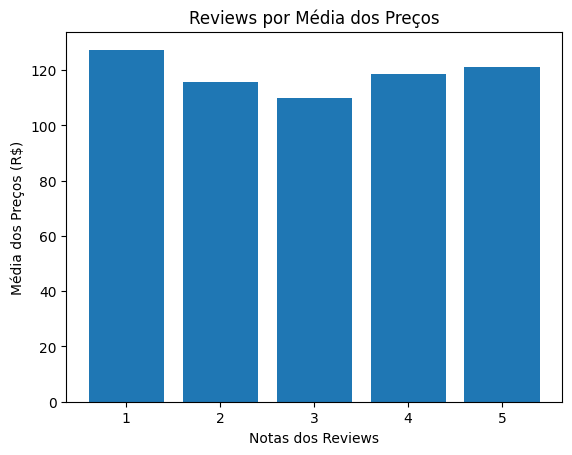

In [182]:
plt.bar(media_review_preco.index, media_review_preco['price'])

plt.xticks(media_review_preco.index)
plt.ylabel('Média dos Preços (R$)')
plt.xlabel('Notas dos Reviews')
plt.title('Reviews por Média dos Preços')

plt.show()

#### <span style = 'color: FFFFFF'> **Médiana de preços por notas de reviews:** </span>

In [159]:
formatar_valores_para_reais(mediana_review_preco, 'median_price', 'price')

,price,median_price
review_score,,
1,75.00,R$ 75.0
2,72.90,R$ 72.9
3,69.99,R$ 69.99
4,75.00,R$ 75.0
5,74.99,R$ 74.99


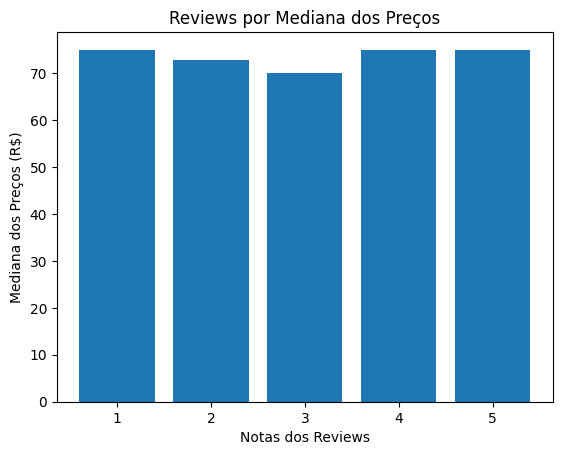

In [183]:
plt.bar(mediana_review_preco.index, mediana_review_preco['price'])

plt.xticks(mediana_review_preco.index)
plt.ylabel('Mediana dos Preços (R$)')
plt.xlabel('Notas dos Reviews')
plt.title('Reviews por Mediana dos Preços')

plt.show()

#### <span style = 'color: FFFFFF'> **Menor preço por notas de reviews:** </span>

In [160]:
formatar_valores_para_reais(minimo_review_preco, 'min_price', 'price')

,price,min_price
review_score,,
1,0.85,R$ 0.85
2,5.31,R$ 5.31
3,3.06,R$ 3.06
4,0.85,R$ 0.85
5,0.85,R$ 0.85


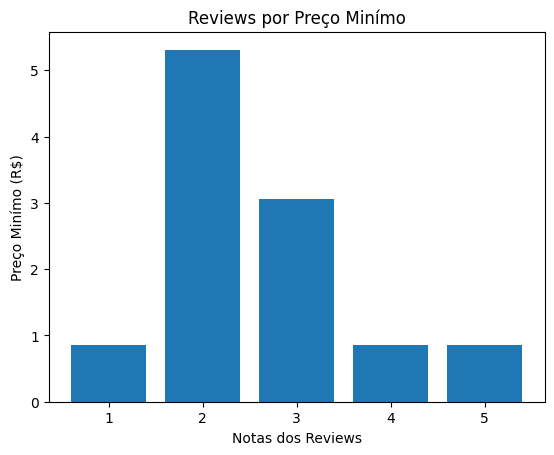

In [186]:
plt.bar(minimo_review_preco.index, minimo_review_preco['price'])

plt.xticks(minimo_review_preco.index)
plt.ylabel('Preço Minímo (R$)')
plt.xlabel('Notas dos Reviews')
plt.title('Reviews por Preço Minímo')

plt.show()

#### <span style = 'color: FFFFFF'> **Maior preço por notas de reviews:** </span>

In [161]:
formatar_valores_para_reais(maximo_review_preco, 'max_price', 'price')

,price,max_price
review_score,,
1,3109.99,R$ 3109.99
2,3999.00,R$ 3999.0
3,2899.00,R$ 2899.0
4,4690.00,R$ 4690.0
5,6735.00,R$ 6735.0


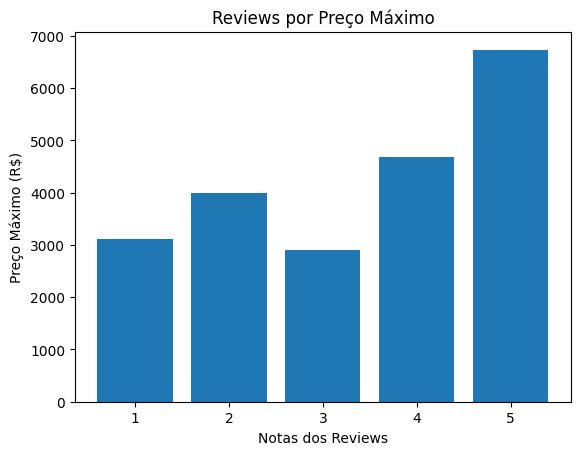

In [187]:
plt.bar(maximo_review_preco.index, maximo_review_preco['price'])

plt.xticks(maximo_review_preco.index)
plt.ylabel('Preço Máximo (R$)')
plt.xlabel('Notas dos Reviews')
plt.title('Reviews por Preço Máximo')

plt.show()

#### <span style = 'color: FFFFFF'> **Desvio padrão dos preços dos pedidos por notas de reviews:** </span>

In [163]:
formatar_valores_para_reais(desvio_padrao_review_preco, 'std_price', 'price')

,price,std_price
review_score,,
1,202.053841,R$ 202.05
2,178.344045,R$ 178.34
3,141.293600,R$ 141.29
4,177.685858,R$ 177.69
5,184.449708,R$ 184.45


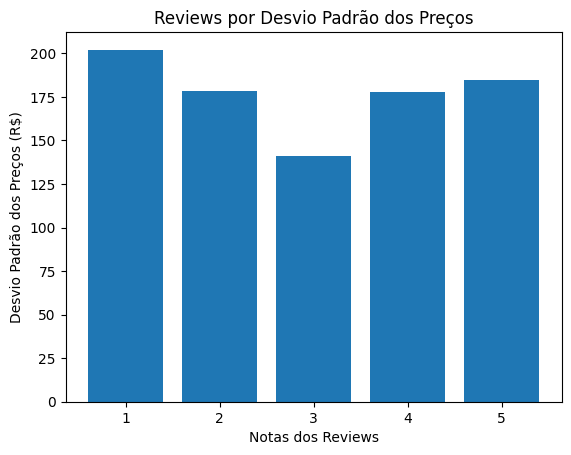

In [188]:
plt.bar(desvio_padrao_review_preco.index, desvio_padrao_review_preco['price'])

plt.xticks(desvio_padrao_review_preco.index)
plt.ylabel('Desvio Padrão dos Preços (R$)')
plt.xlabel('Notas dos Reviews')
plt.title('Reviews por Desvio Padrão dos Preços')

plt.show()

#### <span style = 'color: FFFFFF'> **Quantidade de pedidos por notas de reviews:** </span>

In [162]:
quantidade_review_preco['count'] = quantidade_review_preco['price'].apply(lambda x: locale.format_string('%.2f', x, grouping = True))
quantidade_review_preco

,price,count
review_score,,
1,14235,"14.235,00"
2,3874,"3.874,00"
3,9423,"9.423,00"
4,21315,"21.315,00"
5,63525,"63.525,00"


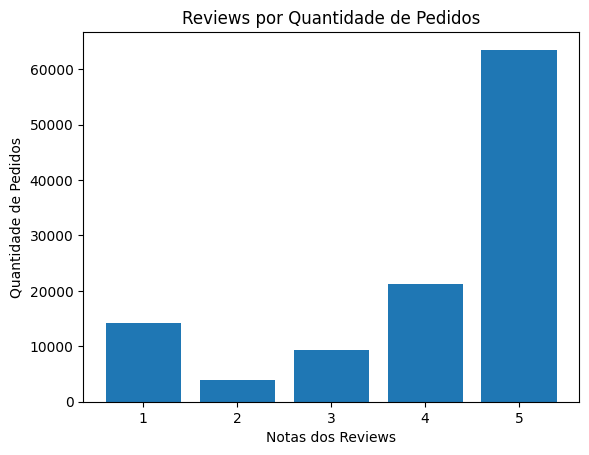

In [189]:
plt.bar(quantidade_review_preco.index, quantidade_review_preco['price'])

plt.xticks(quantidade_review_preco.index)
plt.ylabel('Quantidade de Pedidos')
plt.xlabel('Notas dos Reviews')
plt.title('Reviews por Quantidade de Pedidos')

plt.show()

##### <span style = 'color: #cc9900'> *Comentários:* </span>

- Podemos observar com base nesta análise, que dos 112,372 registro de preços de pedidos, temos uma média de R$ 120.38, uma mediana de R$ 74.90 e um desvio padrão de R$ 182.15.
- Com essas observações, podemos entender qual a relação dos preços com a nota do review.
- Por exemplo, podemos visualizar que temos cerca de 14,235 pedidos com uma avaliação como 1 e 3,874 como 2.
- Destes valores, consecutivamente , a **média** é de R$ R$ 127.35 e R$ R$ 115.85; a **mediana** é de R$ 75.0 e R$ 72.9; o **preço minímo** é de R$ 0.85 e R$ 5.31; O **preço máximo** é de R$ 3,109.99 e R$ 3,999.00; E o **desvio padrão** do preço é de R$ 202.05 e R$ 178.34;
- Podemos visualizar também, e média, mediana, preço minímo, preço máximo, desvio padrão e quantidade de pedidos da avaliação 5.
- Os valores, consecutivamente, são R$ 121.22, R$ 74.99, R$ 0.85, R$ 6735.00, R$ 184.45 e 63,525.00.
- Com esses valores, podemos concluir, que não é necessáriamente o valor do pedido que interfere com na avaliação, já que os realizando a análise descritiva, vemos que os valores entre as avaliação 1 e 2 com a 5, são próximos.

## <span style = 'color: #39CCCC'> **Review x Frete:** </span>

In [55]:
visualizar_tabela(olist_order_reviews_dataset)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


In [56]:
visualizar_tabela(olist_order_items_dataset)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


## <span style = 'color: #39CCCC'> **Review x Tipo de Pagamento:** </span>

In [57]:
visualizar_tabela(olist_order_reviews_dataset)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


In [58]:
visualizar_tabela(olist_order_payments_dataset)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


## <span style = 'color: #39CCCC'> **Review x Valor de Pagamento:** </span>

In [59]:
visualizar_tabela(olist_order_reviews_dataset)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


In [60]:
visualizar_tabela(olist_order_payments_dataset)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


## <span style = 'color: #39CCCC'> **Review x Status do Pedido:** </span>

In [61]:
visualizar_tabela(olist_order_reviews_dataset)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


In [62]:
visualizar_tabela(olist_orders_dataset)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


## <span style = 'color: #39CCCC'> **Review x Data de Entrega:** </span>

In [63]:
visualizar_tabela(olist_order_reviews_dataset)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


In [64]:
visualizar_tabela(olist_orders_dataset)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


## <span style = 'color: #39CCCC'> **Review x Categoria:** </span>

In [65]:
visualizar_tabela(olist_order_reviews_dataset)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


In [66]:
visualizar_tabela(olist_products_dataset)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


## <span style = 'color: #39CCCC'> **Review x Cidade:** </span>

In [67]:
visualizar_tabela(olist_order_reviews_dataset)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


In [68]:
visualizar_tabela(olist_sellers_dataset)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
